***

<div style="text-align: center; color: purple;">
  <h1>The project: "Wind Speed Analysis around the Ireland with a view to Wind Farm"</h1>
</div>

***

![File:Wind farm at sunset.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wind_farm_at_sunset.jpg/800px-Wind_farm_at_sunset.jpg)

## Project Description

This project involves analyzing wind speed data across Ireland to assess the potential for wind farm installations. We are using historical weather data from the sources of [Met Éireann](https://www.met.ie/). The analysis involves data cleaning and normalization to ensure accuracy and reliability. 
The key questions to explore include:

**Wind Power Potential by Location**:

- Evaluating the average wind speed over different timeframes (hourly, daily, monthly, annually).
- Considering operational wind speed ranges for turbines to estimate when and where wind farms could generate power effectively.

**Trends in Wind Speed Over Time**:

- Examining long-term trends in wind speed data to predict future patterns, assessing if wind speeds are likely to remain consistent or change over the next decade.

**Seasonal and Temporal Patterns**:

- Identifying seasonal and daily variations in wind speeds to determine optimal times for energy production.

**Exploration of Other Weather Metrics**:

- Investigate additional factors such as rainfall or temperature that might influence wind speed.

**Forecasting Wind Farm Output**:

- Using weather forecasts, estimate wind farm power output for the coming week, integrating turbine efficiency and location data.

**Insights**:

- Explore factors influencing the viability and performance of wind farms in Ireland.

***

## Data Source Exploration

For this project, I conducted research to locate reliable sources of historical weather data for analysis. The following resources were used to gather daily climate and wind speed data:  

- **[Met Éireann Daily Data](https://www.met.ie/climate/available-data/daily-data)**: A trusted source providing detailed historical weather records across Ireland.  
- **[Met Éireann Wikipedia Entry](https://en.wikipedia.org/wiki/Met_%C3%89ireann)**: Used to gain an overview of the organization and its data offerings.  
- **[Irish Open Data Portal - Met Éireann](https://data.gov.ie/organization/meteireann?q=daily+data&sort=score+desc%2C+metadata_modified+desc)**: An open-access repository featuring datasets and metadata for climate and weather research in Ireland.  

***

## Import libraries

- [Pandas](https://pandas.pydata.org/docs/)
- [Numpy](https://numpy.org/doc/stable/reference/index.html#reference)
- [Requests: HTTP for Humans™](https://requests.readthedocs.io/en/latest/)
- [io — Core tools for working with streams](https://docs.python.org/3/library/io.html)
- [os — Miscellaneous operating system interfaces](https://docs.python.org/3/library/os.html)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Choose the style.
plt.style.use("grayscale")

***

## Selection of Data for Analysis

Based on my research and exploration of available data sources, I decided to take a broader approach and conduct an overall analysis of the current weather stations in Ireland and their corresponding data availability. This decision was made to gain a comprehensive understanding of the wind speed variability and its distribution over time. By focusing on these stations, I aim to explore how wind speeds fluctuate across the country, providing a solid foundation for further analysis of wind patterns and trends. This will help shape the direction of my future analyses, enabling more detailed assessments of wind energy potential in Ireland.

In [2]:
# Dictionary of station names and IDs
stations = {
    "Athenry": 1875,
    "Ballyhaise": 675,
    "Belmullet": 2375,
    "Casement": 3723,
    "Claremorris": 2175,
    "Cork Airport": 3904,
    "Dublin Airport": 532,
    "Dunsany": 1375,
    "Finner": 2075,
    "Gurteen": 1475,
    "Johnstown Castle": 1775,
    "Knock Airport": 4935,
    "Malin Head": 1575,
    "Mace Head": 275,
    "Moore Park": 575,
    "Mount Dillon": 1975,
    "Mullingar": 875,
    "Newport": 1175,
    "Oak Park": 375,
    "Roches Point": 1075,
    "Shannon Airport": 518,
    "Sherkin Island": 775,
    "Valentia Observatory": 2275
}


I based my analysis on a base URL for fetching data from various weather stations in Ireland. Using a Python script, I was able to retrieve the relevant data by looping through a list of station names and their respective IDs. The script downloads weather data for each station, skips unnecessary rows, and saves the data into separate CSV files for each station. This process allows for a structured collection of wind speed and other weather parameters across multiple stations, providing a solid foundation for further analysis of wind speed distribution and variability over time.

In [3]:
# Base URL
base_url = "https://cli.fusio.net/cli/climate_data/webdata/dly{}.csv"

# Folder to store data
data_folder = "Data"
os.makedirs(data_folder, exist_ok=True)

# Loop to fetch and save data
for station_name, station_id in stations.items():
    url = base_url.format(station_id)
    print(f"Fetching data from {url} for station: {station_name} (ID: {station_id})...")

    try:
        # Download the data, skipping the first 24 rows
        response = requests.get(url)
        response.raise_for_status()
        station_data = pd.read_csv(StringIO(response.text), skiprows=24, skipinitialspace=True)
        
        # Save to CSV in the Data folder with station name and ID in the filename
        file_path = os.path.join(data_folder, f"{station_name}_station_{station_id}.csv")
        station_data.to_csv(file_path, index=False)
    
    
    except Exception as e:
        print(f"Error fetching data for station {station_name} (ID: {station_id}): {e}")

Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly1875.csv for station: Athenry (ID: 1875)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly675.csv for station: Ballyhaise (ID: 675)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2375.csv for station: Belmullet (ID: 2375)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly3723.csv for station: Casement (ID: 3723)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2175.csv for station: Claremorris (ID: 2175)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly3904.csv for station: Cork Airport (ID: 3904)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly532.csv for station: Dublin Airport (ID: 532)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly1375.csv for station: Dunsany (ID: 1375)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2075.csv 

After downloading the data, I reviewed the contents, which revealed that the datasets contained varying numbers of columns across different stations. Despite this, most of the data points were consistent across the stations, allowing for the potential to combine the relevant variables for analysis. As a result, I merged the useful variables, such as wind speed, temperature, and other key weather parameters, into a single dataset, enabling a more comprehensive analysis across all the stations.

**Weather Data Variables**:

1. **date**:  -  00 to 00 utc
2. **rain**:  -  Precipitation Amount (mm)
3. **maxtp**: -  Maximum Air Temperature (C)	 
4. **mintp**: -  Minimum  Air Temperature (C)
5. **cbl**:   -  Mean CBL Pressure (hpa)
6. **wdsp**:  -  Mean Wind Speed (kt)
7. **hm**:    -  Highest ten minute mean wind speed (kt)		              
8. **ddhm**:  -  Wind Direction at max 10 min mean (deg)                  
9. **hg**:    -  Highest Gust (kt)

In [4]:
# Define the columns of interest
columns_of_interest = ['date', 'maxtp', 'mintp', 'rain', 'cbl', 'wdsp', 'hm', 'ddhm', 'hg']

After selecting the relevant columns, the data was combined into a single file, with additional columns added for the station name and its ID.

In [5]:
# Reverse the dictionary for quick lookup
station_ids_to_names = {v: k for k, v in stations.items()}

# Output file path
output_file = "All_stations_data.csv"

# Initialize an empty list for combined data
combined_data = []

# Loop through all files in the folder
for file_name in os.listdir(data_folder):
    try:
        # Extract station ID from the file name
        station_id = int(file_name.split('_')[-1].split('.')[0])
        station_name = station_ids_to_names.get(station_id, "Unknown")
        
        # Read the data and add columns
        file_path = os.path.join(data_folder, file_name)
        station_data = pd.read_csv(file_path)[columns_of_interest]
        station_data["Station_ID"] = station_id
        station_data["Station_Name"] = station_name
        
        # Add the data to the combined list
        combined_data.append(station_data)
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Combine and save the final DataFrame
pd.concat(combined_data, ignore_index=True).to_csv(output_file, index=False)
print(f"All data saved to {output_file}")


All data saved to All_stations_data.csv


Now that we have a consolidated dataset, we can begin exploring and analyzing it using appropriate tools to understand its structure, assess data completeness, and derive overall comparative statistics.

In [ ]:
# Load the combined dataset into a Pandas DataFrame
df_all = pd.read_csv("All_stations_data.csv", low_memory=False, date_format = 'mixed', parse_dates=['date'])

# Show
df_all.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg,Station_ID,Station_Name
0,2010-02-26,7.6,1.8,0.1,983.8,8.3,14.0,230.0,20.0,1875,Athenry
1,2010-02-27,8.6,-2.4,0.1,985.0,4.3,9.0,170.0,14.0,1875,Athenry
2,2010-02-28,8.8,-3.3,0.0,992.9,4.9,17.0,290.0,24.0,1875,Athenry
3,2010-03-01,10.0,-4.3,0.0,1006.3,2.3,6.0,50.0,8.0,1875,Athenry
4,2010-03-02,8.2,-1.8,0.0,1014.4,7.1,12.0,120.0,19.0,1875,Athenry


In [ ]:

# [Knot (unit)](https://en.wikipedia.org/wiki/Knot_(unit))

df_all['wdsp'] = df_all['wdsp'] * 0.514444  # Convert wind speed from knots to m/s

# Ensure data consistency for later analysis
df_all.rename(columns={'wdsp': 'wdsp_mps'}, inplace=True)  # Rename column to reflect the new units

# Print a sample of the dataset to confirm conversion
print(df_all[['Station_Name', 'date', 'wdsp_mps']].head())

  Station_Name       date  wdsp_mps
0      Athenry 2010-02-26  4.269885
1      Athenry 2010-02-27  2.212109
2      Athenry 2010-02-28  2.520776
3      Athenry 2010-03-01  1.183221
4      Athenry 2010-03-02  3.652552


In [ ]:
# Extract the year from the date
df_all['year'] = df_all['date'].dt.year

# Group by station and find the minimum and maximum year
station_year_range = df_all.groupby("Station_Name")['year'].agg(['min', 'max'])

# Add the number of records for each station
station_record_count = df_all.groupby("Station_Name").size()

# Merge the year range information and the record count into one table
station_summary = station_year_range.join(station_record_count.rename('Record_Count'))

# Sort the summary by the 'min' (minimum year) in ascending order
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)

print(station_summary_sorted)


                       min   max  Record_Count
Station_Name                                  
Valentia Observatory  1942  2024         30254
Dublin Airport        1942  2024         30255
Shannon Airport       1945  2024         28916
Claremorris           1950  2024         27317
Roches Point          1955  2024         21406
Malin Head            1955  2024         25387
Belmullet             1956  2024         24882
Cork Airport          1962  2024         22950
Casement              1964  2024         22220
Mullingar             1973  2024         18621
Knock Airport         1996  2024         10317
Mace Head             2003  2024          7698
Moore Park            2003  2024          7689
Oak Park              2003  2024          7678
Ballyhaise            2003  2024          7675
Sherkin Island        2004  2024          7474
Mount Dillon          2004  2024          7351
Newport               2005  2024          7186
Dunsany               2006  2024          6750
Gurteen      

In [33]:
# Filter data starting from January 1, 2010
df_2010_2024 = df_all[df_all['date'] >= '2010-01-01']

df_2010_2024.head(10)

,date,maxtp,mintp,rain,cbl,wdsp_mps,hm,ddhm,hg,Station_ID,Station_Name,year
0,2010-02-26,7.6,1.8,0.1,983.8,4.269885,14.0,230.0,20.0,1875,Athenry,2010
1,2010-02-27,8.6,-2.4,0.1,985.0,2.212109,9.0,170.0,14.0,1875,Athenry,2010
2,2010-02-28,8.8,-3.3,0.0,992.9,2.520776,17.0,290.0,24.0,1875,Athenry,2010
3,2010-03-01,10.0,-4.3,0.0,1006.3,1.183221,6.0,50.0,8.0,1875,Athenry,2010
4,2010-03-02,8.2,-1.8,0.0,1014.4,3.652552,12.0,120.0,19.0,1875,Athenry,2010
5,2010-03-03,5.6,1.4,12.5,1013.6,2.777998,8.0,110.0,13.0,1875,Athenry,2010
6,2010-03-04,7.7,-0.9,0.0,1022.1,2.417887,9.0,60.0,13.0,1875,Athenry,2010
7,2010-03-05,9.7,-4.7,0.1,1028.4,1.234666,6.0,320.0,9.0,1875,Athenry,2010
8,2010-03-06,8.6,-4.1,0.0,1025.2,1.440443,8.0,70.0,12.0,1875,Athenry,2010
9,2010-03-07,7.8,-2.1,0.0,1025.6,3.343886,12.0,120.0,18.0,1875,Athenry,2010


In [34]:

station_year = df_2010_2024.groupby("Station_Name")['year'].agg(['min', 'max'])
station_record_count = df_2010_2024.groupby("Station_Name").size()
station_summary = station_year.join(station_record_count.rename('Record_Count'))
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)
print(station_summary_sorted)

                       min   max  Record_Count
Station_Name                                  
Athenry               2010  2024          5362
Shannon Airport       2010  2024          5418
Roches Point          2010  2024          5418
Oak Park              2010  2024          5415
Newport               2010  2024          5415
Mullingar             2010  2024          5418
Mount Dillon          2010  2024          5417
Moore Park            2010  2024          5418
Malin Head            2010  2024          5418
Mace Head             2010  2024          5417
Sherkin Island        2010  2024          5418
Knock Airport         2010  2024          5418
Gurteen               2010  2024          5418
Dunsany               2010  2024          5418
Dublin Airport        2010  2024          5418
Cork Airport          2010  2024          5418
Claremorris           2010  2024          5418
Casement              2010  2024          5418
Belmullet             2010  2024          5418
Ballyhaise   

In [35]:
df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124157 entries, 0 to 344413
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          124157 non-null  datetime64[ns]
 1   maxtp         124145 non-null  float64       
 2   mintp         124144 non-null  float64       
 3   rain          124129 non-null  float64       
 4   cbl           124036 non-null  float64       
 5   wdsp_mps      124111 non-null  float64       
 6   hm            124143 non-null  float64       
 7   ddhm          124140 non-null  float64       
 8   hg            124144 non-null  float64       
 9   Station_ID    124157 non-null  int64         
 10  Station_Name  124157 non-null  object        
 11  year          124157 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1), object(1)
memory usage: 11.8+ MB


In [36]:
df_2010_2024.isna().sum()

date              0
maxtp            12
mintp            13
rain             28
cbl             121
wdsp_mps         46
hm               14
ddhm             17
hg               13
Station_ID        0
Station_Name      0
year              0
dtype: int64

In [37]:
# Count NaN values per Station_ID and across all columns
nan_counts_per_station = df_2010_2024.groupby('Station_Name').apply(lambda x: x.isna().sum())

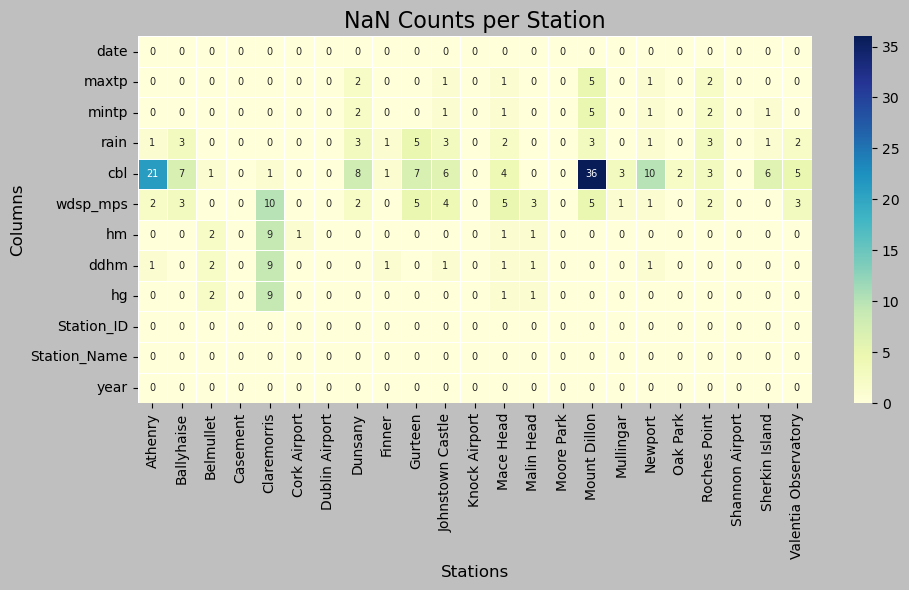

In [48]:
# Create a heatmap of NaN counts per station and column
plt.figure(figsize=(10, 6))  # the size
sns.heatmap(nan_counts_per_station.T, cmap='YlGnBu', annot=True, annot_kws={'size': 7}, fmt='d', linewidths=0.5)

plt.title("NaN Counts per Station", fontsize=16)
plt.xlabel("Stations", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)   

plt.tight_layout()

In [39]:
df_2010_2024 = df_2010_2024.copy()
df_2010_2024['wdsp_mps'] = df_2010_2024['wdsp_mps'].fillna(df_2010_2024['wdsp_mps'].median())

In [40]:
df_2010_2024['wdsp_mps'].isna().sum()

0

In [41]:
# This line sets the 'date' column as the index for df, modifying the DataFrame in place.
df_2010_2024.set_index('date', inplace=True)

In [42]:
# Group by Station_Name and calculate the monthly mean for wind speed
monthly_mean_wind_speed = df_2010_2024.groupby("Station_Name")['wdsp_mps'].resample('M').mean()

Wind turbines used in large-scale wind farms typically have operational wind speed ranges that determine when they can generate electricity safely and efficiently. These ranges are as follows:

Cut-in Wind Speed: This is the minimum wind speed at which turbines begin to operate. It is generally around 3–5 m/s (approximately 10.8–18 km/h).

Rated Wind Speed: This is the wind speed at which turbines produce their maximum power output. It is usually between 12–15 m/s (approximately 43–54 km/h).

Cut-out Wind Speed: This is the maximum wind speed at which turbines shut down to avoid damage. This threshold is typically around 20–25 m/s (approximately 72–90 km/h)

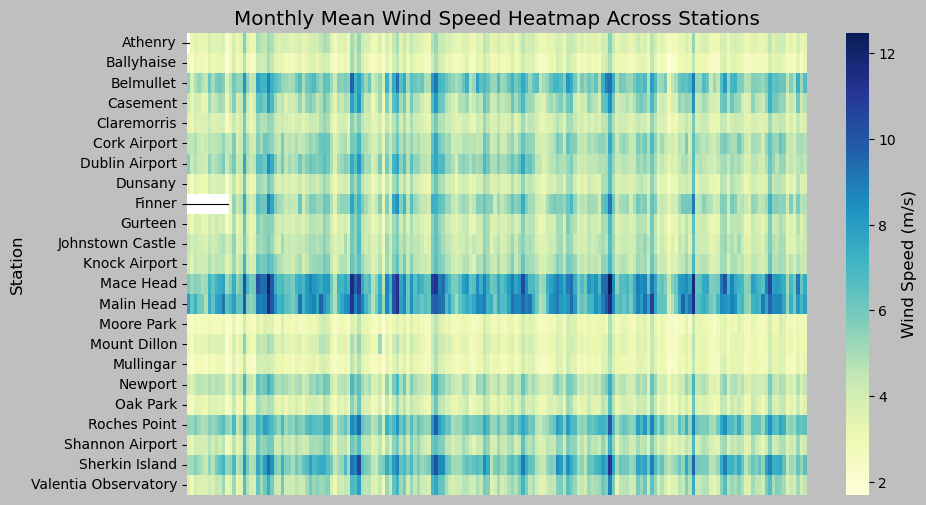

In [68]:
heatmap_data = monthly_mean_wind_speed.reset_index().pivot(index='Station_Name', columns='date', values='wdsp_mps')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Wind Speed (m/s)'})
plt.title("Monthly Mean Wind Speed Heatmap Across Stations")
plt.xlabel("")  # Remove x-axis label
plt.xticks([])  # Remove x-axis tick labels
plt.ylabel("Station");


c:\Users\uliya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



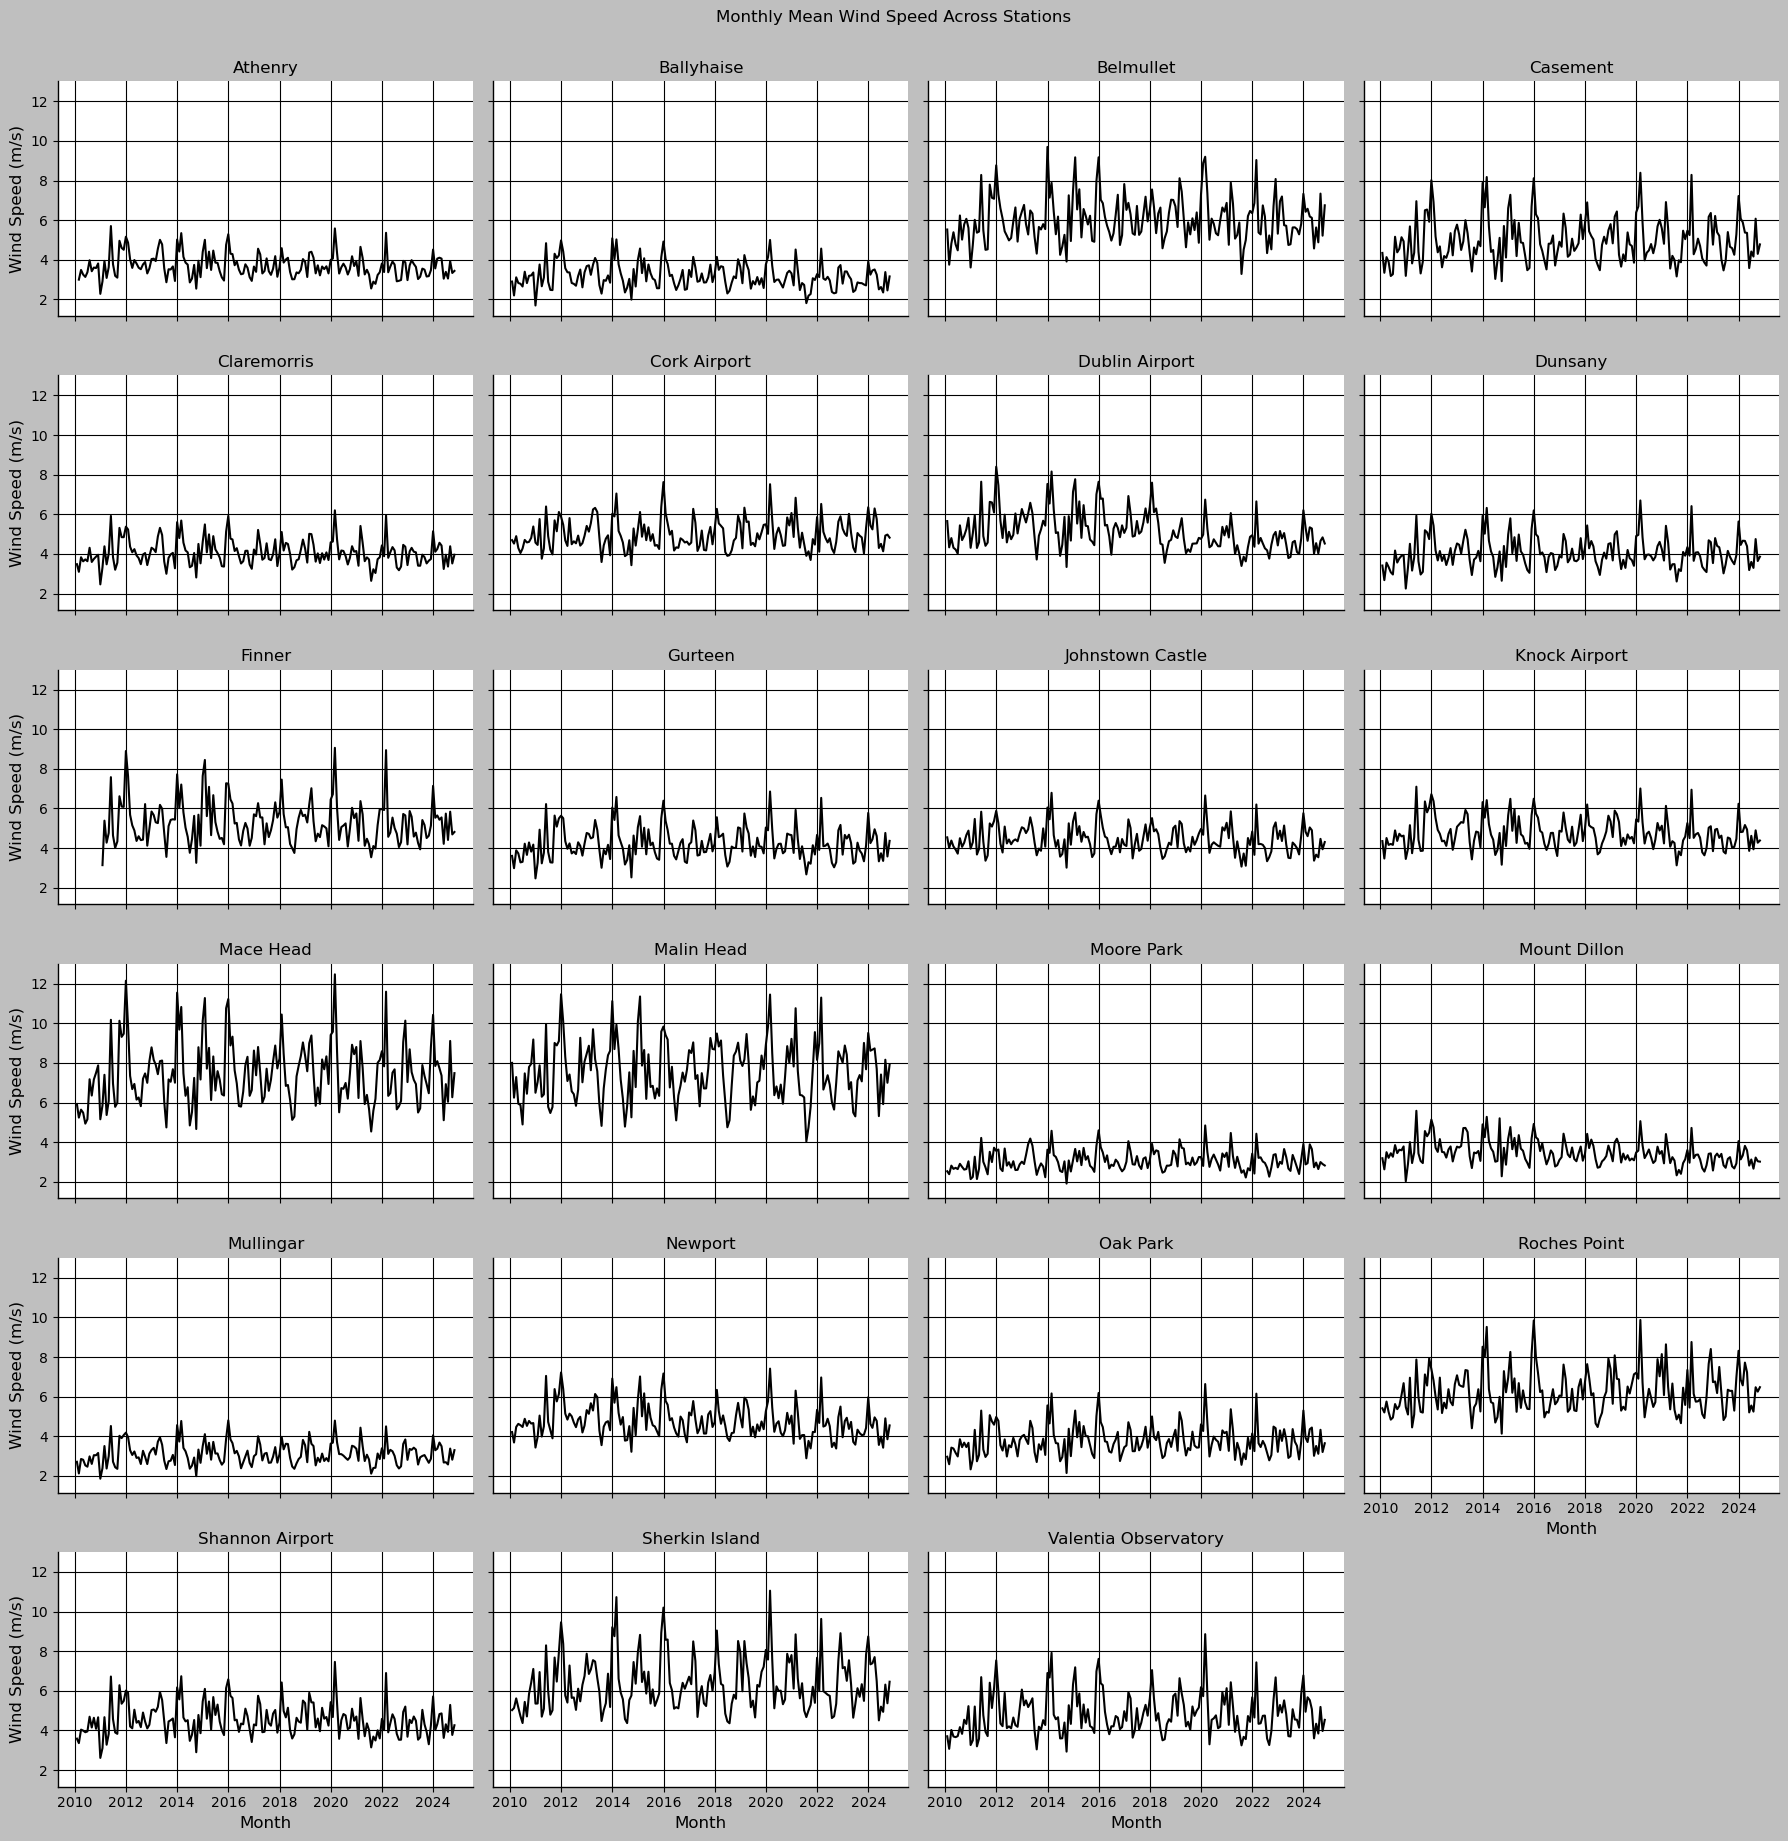

In [67]:
data_for_plot = monthly_mean_wind_speed.reset_index()

g = sns.FacetGrid(data_for_plot, col="Station_Name", col_wrap=4, height=3, aspect=1.5, sharey=True)
g.map(sns.lineplot, "date", "wdsp_mps")
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Wind Speed (m/s)")
g.fig.suptitle("Monthly Mean Wind Speed Across Stations", y=1.02);